In [1]:
!pip install -r /content/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 59.4 MB/s eta 0:00:00


# Сбор и подготовка данных

In [ ]:
import pandas as pd

# Загрузка обучающего датасета
training_df = pd.read_csv('/content/payments_training.tsv', sep='\t')

# Загрузка основного датасета
main_df = pd.read_csv('/content/payments_main.tsv', sep='\t')

In [ ]:
import pandas as pd

# Определите названия столбцов
main_columns = ['Номер строки', 'Дата', 'Сумма', 'Назначение платежа']
training_columns = ['Номер строки', 'Дата', 'Сумма', 'Назначение платежа', 'Категория']

# Загрузка основного датасета
payments_main_df = pd.read_csv('/content/payments_main.tsv', sep='\t', header=None, names=main_columns)

# Проверка загруженных данных
print("Основной датасет:")
print(payments_main_df.head())

# Сохранение основного датасета с новыми названиями столбцов
payments_main_df.to_csv('payments_main_updated.tsv', sep='\t', index=False)

# Загрузка обучающего датасета
payments_training_df = pd.read_csv('/content/payments_training.tsv', sep='\t', header=None, names=training_columns)

# Проверка загруженных данных
print("\nОбучающий датасет:")
print(payments_training_df.head())

# Сохранение обучающего датасета с новыми названиями столбцов
payments_training_df.to_csv('payments_training_updated.tsv', sep='\t', index=False)

print("\nСтолбцы успешно добавлены и данные сохранены в новые файлы!")

Основной датасет:
   Номер строки        Дата     Сумма  \
0             1  07.11.2024  40500.00   
1             2  07.11.2024  32600,00   
2             3  07.11.2024   4710-00   
3             4  07.11.2024  30900-00   
4             5  07.11.2024  13200.00   

                                  Назначение платежа  
0     За тур.поездку по договору №001 от 27.01.2023г  
1  За оказание услуг по договору №53Б-02746 от 23...  
2                                      Оплата штрафа  
3      Лечение по договору №Д-00359/24 от 08.03.2025  
4  Оплата основного долга за период с 16.12.2024г...  

Обучающий датасет:
   Номер строки        Дата         Сумма  \
0             1  07.11.2024      15300.00   
1             2  07.11.2024      40200,00   
2             3  07.11.2024       1440-00   
3             4  07.11.2024  240000000-00   
4             5  07.11.2024    1360000.00   

                                  Назначение платежа       Категория  
0  За участие в конференции в г. Майкоп по 

In [ ]:
# Проверка данных
training_df = payments_training_df
training_df

,Номер строки,Дата,Сумма,Назначение платежа,Категория
0,1,07.11.2024,15300.00,За участие в конференции в г. Майкоп по догово...,SERVICE
1,2,07.11.2024,"40200,00",За оказание услуг по договору №79-02726В от 01...,SERVICE
2,3,07.11.2024,1440-00,Оплата за Порошок стиральный Ariel Color autom...,NON_FOOD_GOODS
3,4,07.11.2024,240000000-00,Возврат денежных средств по договору займа №04...,LOAN
4,5,07.11.2024,1360000.00,"Оплата Дог №452 от 13/03/2021, согл. Сч 0745-2...",NOT_CLASSIFIED
...,...,...,...,...,...
495,496,07.11.2024,2610.00,Оплата налогов,TAX
496,497,07.11.2024,31200-00,Комиссия за выполнение функций агента валютног...,BANK_SERVICE
497,498,07.11.2024,18200-00,За тур.поездку по договору №75-04243Г от 24/04...,SERVICE
498,499,07.11.2024,"2870000,00","Оплата по договору №095 от 24.02.2025г, счету ...",FOOD_GOODS


In [ ]:
main_df = payments_main_df
main_df

,Номер строки,Дата,Сумма,Назначение платежа
0,1,07.11.2024,40500.00,За тур.поездку по договору №001 от 27.01.2023г
1,2,07.11.2024,"32600,00",За оказание услуг по договору №53Б-02746 от 23...
2,3,07.11.2024,4710-00,Оплата штрафа
3,4,07.11.2024,30900-00,Лечение по договору №Д-00359/24 от 08.03.2025
4,5,07.11.2024,13200.00,Оплата основного долга за период с 16.12.2024г...
...,...,...,...,...
24995,24996,07.11.2024,"3300000,00",Оплата по договору №Е01905 от 25.02.2023. сырь...
24996,24997,07.11.2024,"2270,00",гос.услуга
24997,24998,07.11.2024,1750000.00,Предоставление кредита по договору №Д-00803/03...
24998,24999,07.11.2024,3560.00,Оплата гос. пошлины


# Весь мой проект

## Предобработка данных

In [ ]:
import pandas as pd
import re
from datetime import datetime
from spellchecker import SpellChecker
from multiprocessing import Pool, cpu_count

# Инициализация SpellChecker для русского языка
spell = SpellChecker(language='ru')

# Создаем словарь для кэширования исправлений
spell_cache = {}

# Обновленная функция для стандартизации суммы
def standardize_amount(amount):
    # Удаление лишних символов и замена запятой на точку
    if isinstance(amount, str):
        # Удаляем все символы, кроме цифр, точек и знака минус
        amount = re.sub(r'[^\d.,-]', '', amount)

        # Замена минуса на точку, если он используется как разделитель
        if '-' in amount:
            amount = amount.replace('-', '.')

        # Замена запятой на точку
        amount = amount.replace(',', '.')

        # Удаление всех символов кроме цифр и точки
        amount = re.sub(r'[^0-9.-]', '', amount)

        # Преобразование в float с обработкой исключений
        try:
            return float(amount)
        except ValueError:
            return None  # Вернем NaN, если преобразование не удалось
    else:
        return amount  # Если не строка, возвращаем как есть (можно использовать NaN)

def standardize_date(date_str):
    for fmt in ('%d.%m.%Y', '%d.%m.%y', '%d/%m/%Y', '%d %B %y', '%d %B %Y'):
        try:
            return datetime.strptime(date_str, fmt).strftime('%Y-%m-%d')
        except ValueError:
            continue
    return None

def replace_abbreviations(text):
    abbreviations = {
        'дог': 'договор',
        'сч': 'счет',
        'услуги доставки': 'услуги по доставке',
        # Добавьте другие сокращения по необходимости
    }
    for abbr, full in abbreviations.items():
        text = re.sub(r'\b{}\b'.format(abbr), full, text)
    return text

def preprocess_text_initial(text):
    # Приведение к нижнему регистру
    text = text.lower()
    # Замена сокращений
    text = replace_abbreviations(text)
    # Удаление специальных символов
    text = re.sub(r'[^а-яё\s]', ' ', text)
    # Замена множественных пробелов на один
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

def get_unique_words(series):
    unique_words = set()
    for text in series:
        words = re.findall(r'\b\w+\b', text.lower())
        unique_words.update(words)
    return unique_words

def correction_worker(word):
    if spell.unknown([word]):
        corrected = spell.correction(word)
        if corrected is None:
            corrected = word
    else:
        corrected = word
    return (word, corrected)

def create_spell_corrections_parallel(unique_words):
    with Pool(cpu_count()) as pool:
        corrections = pool.map(correction_worker, unique_words)
    return dict(corrections)

def apply_spell_corrections_parallel(text, corrections_dict):
    words = re.findall(r'\b\w+\b', text.lower())
    corrected_words = [corrections_dict.get(word, word) for word in words]
    return ' '.join(corrected_words)

def preprocess_dataframe(df):
    # Стандаризация суммы и даты
    df['Сумма'] = df['Сумма'].apply(standardize_amount)
    df['Дата'] = df['Дата'].apply(standardize_date)

    # Первичная предобработка текста
    df['Назначение платежа_Clean'] = df['Назначение платежа'].apply(preprocess_text_initial)

    # Извлечение уникальных слов
    unique_words = get_unique_words(df['Назначение платежа_Clean'])

    # Создание словаря исправлений в параллельном режиме
    corrections_dict = create_spell_corrections_parallel(unique_words)

    # Применение исправлений к всему датасету
    with Pool(cpu_count()) as pool:
        # Для больших датасетов лучше использовать pool.imap для экономии памяти
        corrected_texts = pool.starmap(apply_spell_corrections_parallel, [(text, corrections_dict) for text in df['Назначение платежа_Clean']])

    df['Назначение платежа_Clean'] = corrected_texts

    return df

# Пример применения
if __name__ == "__main__":
    # Загрузка данных
    training_df = pd.read_csv('/content/payments_training_updated.tsv', sep='\t')
    main_df = pd.read_csv('/content/payments_main_updated.tsv', sep='\t')

    # Предобработка обучающего датасета
    training_df = preprocess_dataframe(training_df)

    # Предобработка основного датасета
    main_df = preprocess_dataframe(main_df)

    print(training_df.head())
    print(main_df.head())

   Номер строки        Дата        Сумма  \
0             1  2024-11-07      15300.0   
1             2  2024-11-07      40200.0   
2             3  2024-11-07       1440.0   
3             4  2024-11-07  240000000.0   
4             5  2024-11-07    1360000.0   

                                  Назначение платежа       Категория  \
0  За участие в конференции в г. Майкоп по догово...         SERVICE   
1  За оказание услуг по договору №79-02726В от 01...         SERVICE   
2  Оплата за Порошок стиральный Ariel Color autom...  NON_FOOD_GOODS   
3  Возврат денежных средств по договору займа №04...            LOAN   
4  Оплата Дог №452 от 13/03/2021, согл. Сч 0745-2...  NOT_CLASSIFIED   

                            Назначение платежа_Clean  
0  за участие я конференция я я майкл по договор ...  
1              за показания услуга по договор я от я  
2  оплата за порошок стиральная ко по счету от ав...  
3  возврат денежный средств по договор займи а от...  
4  оплата договор от сол сч

In [ ]:
# Сохранение обучающего датасета с новыми названиями столбцов
training_df.to_csv('training_payment.tsv', sep='\t', index=False)

In [ ]:
# Сохранение обучающего датасета с новыми названиями столбцов
main_df.to_csv('main_payment.tsv', sep='\t', index=False)

## Анализ данных

In [2]:
import pandas as pd

train_df = pd.read_csv('/content/training_payment.tsv', sep='\t')
train_df

,Номер строки,Дата,Сумма,Назначение платежа,Категория,Назначение платежа_Clean
0,1,2024-11-07,15300.0,За участие в конференции в г. Майкоп по догово...,SERVICE,за участие я конференция я я майкл по договор ...
1,2,2024-11-07,40200.0,За оказание услуг по договору №79-02726В от 01...,SERVICE,за показания услуга по договор я от я
2,3,2024-11-07,1440.0,Оплата за Порошок стиральный Ariel Color autom...,NON_FOOD_GOODS,оплата за порошок стиральная ко по счету от ав...
3,4,2024-11-07,240000000.0,Возврат денежных средств по договору займа №04...,LOAN,возврат денежный средств по договор займи а от...
4,5,2024-11-07,1360000.0,"Оплата Дог №452 от 13/03/2021, согл. Сч 0745-2...",NOT_CLASSIFIED,оплата договор от сол счет от я оплата за сбро...
...,...,...,...,...,...,...
495,496,2024-11-07,2610.0,Оплата налогов,TAX,оплата налоговая
496,497,2024-11-07,31200.0,Комиссия за выполнение функций агента валютног...,BANK_SERVICE,комиссия за выполнение функция агента валютног...
497,498,2024-11-07,18200.0,За тур.поездку по договору №75-04243Г от 24/04...,SERVICE,за тур поездку по договор я от
498,499,2024-11-07,2870000.0,"Оплата по договору №095 от 24.02.2025г, счету ...",FOOD_GOODS,оплата по договор от я счету от я за дымовские...


In [3]:
mn_df = pd.read_csv('/content/main_payment.tsv', sep='\t')
mn_df

,Номер строки,Дата,Сумма,Назначение платежа,Назначение платежа_Clean
0,1,2024-11-07,40500.0,За тур.поездку по договору №001 от 27.01.2023г,за тур поездку по договор от я
1,2,2024-11-07,32600.0,За оказание услуг по договору №53Б-02746 от 23...,за показания услуга по договор я от
2,3,2024-11-07,4710.0,Оплата штрафа,оплата штраф
3,4,2024-11-07,30900.0,Лечение по договору №Д-00359/24 от 08.03.2025,лечение по договор я от
4,5,2024-11-07,13200.0,Оплата основного долга за период с 16.12.2024г...,оплата основной долга за период я я по марта я...
...,...,...,...,...,...
24995,24996,2024-11-07,3300000.0,Оплата по договору №Е01905 от 25.02.2023. сырь...,оплата по договор е от семье для пвадсумма я я...
24996,24997,2024-11-07,2270.0,гос.услуга,год услуга
24997,24998,2024-11-07,1750000.0,Предоставление кредита по договору №Д-00803/03...,представление кредит по договор я от я приобре...
24998,24999,2024-11-07,3560.0,Оплата гос. пошлины,оплата год пошли


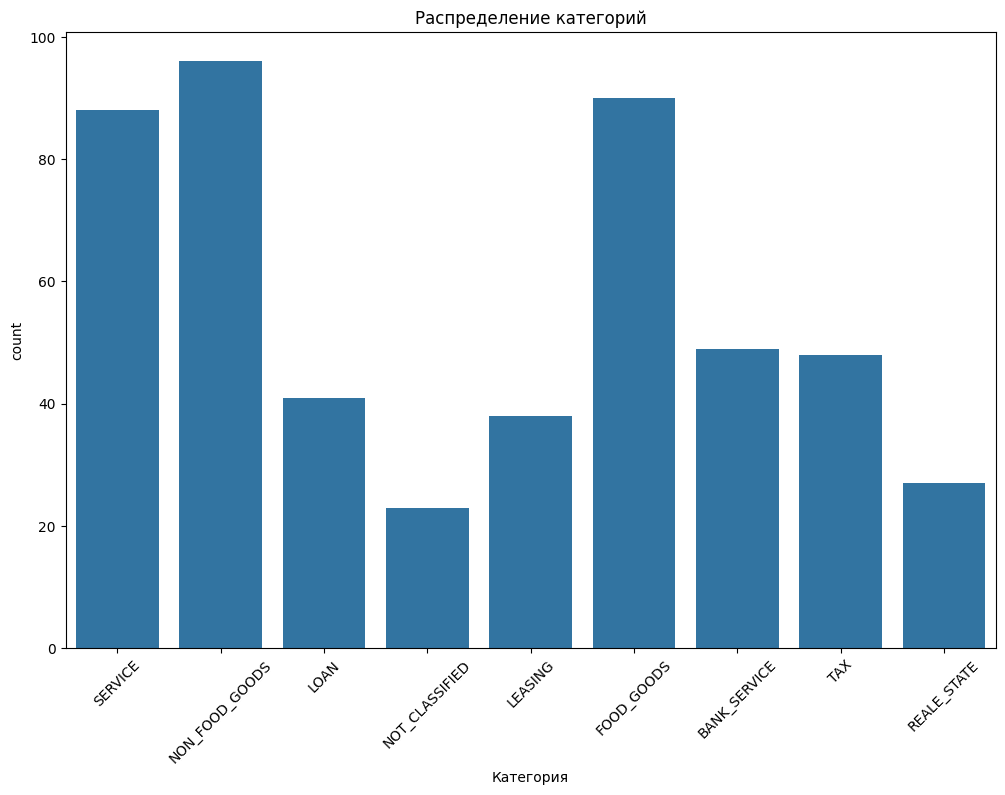

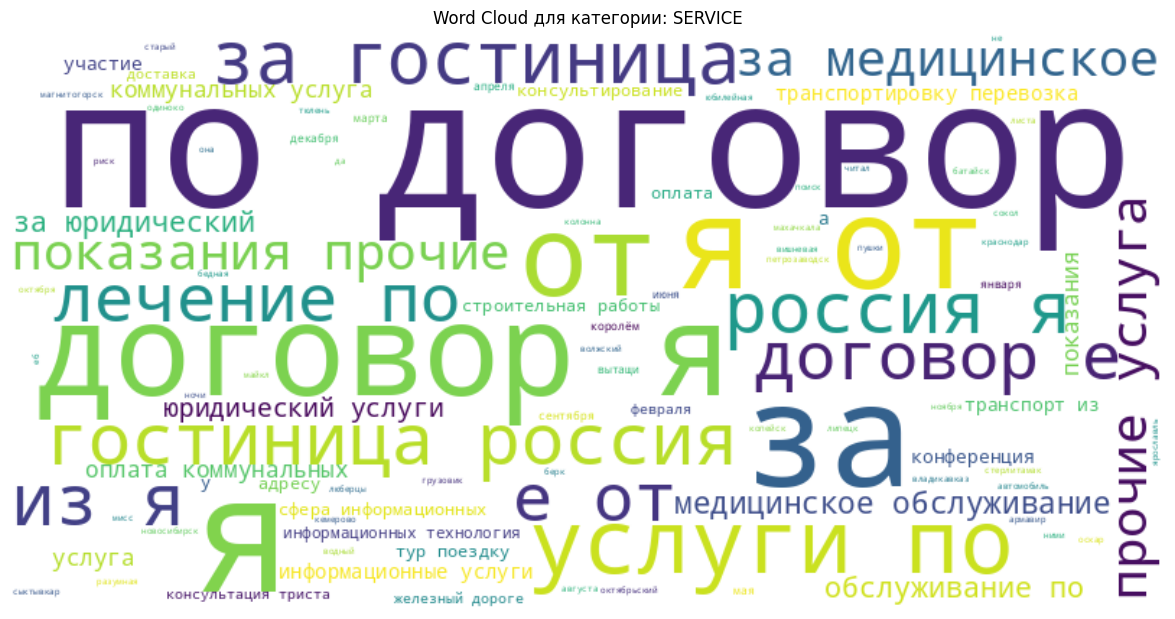

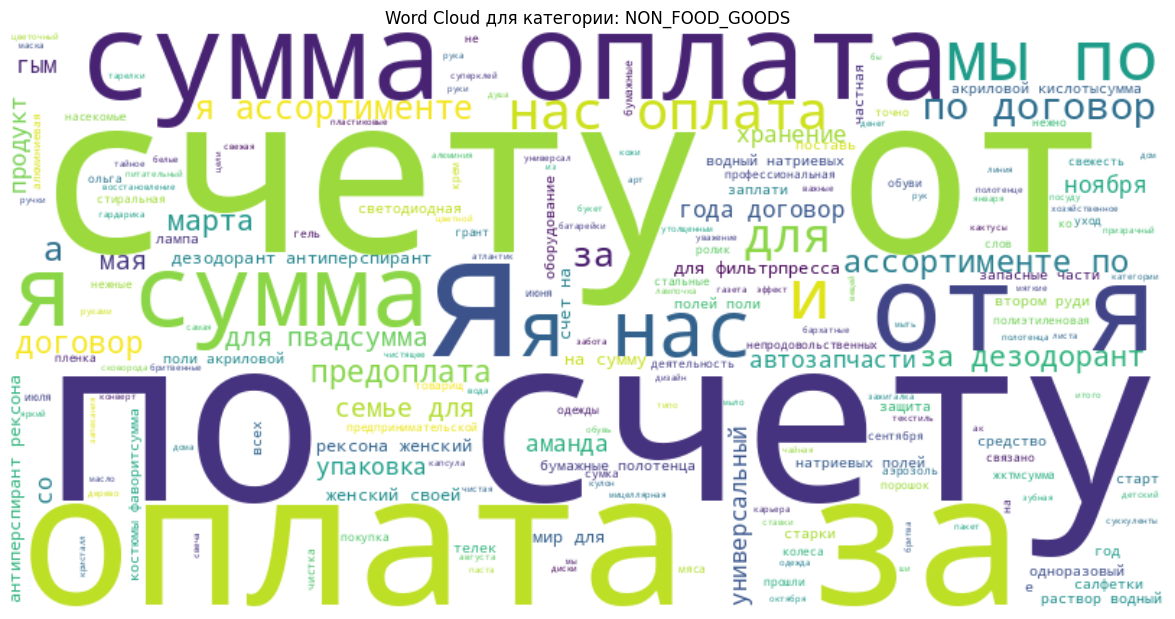

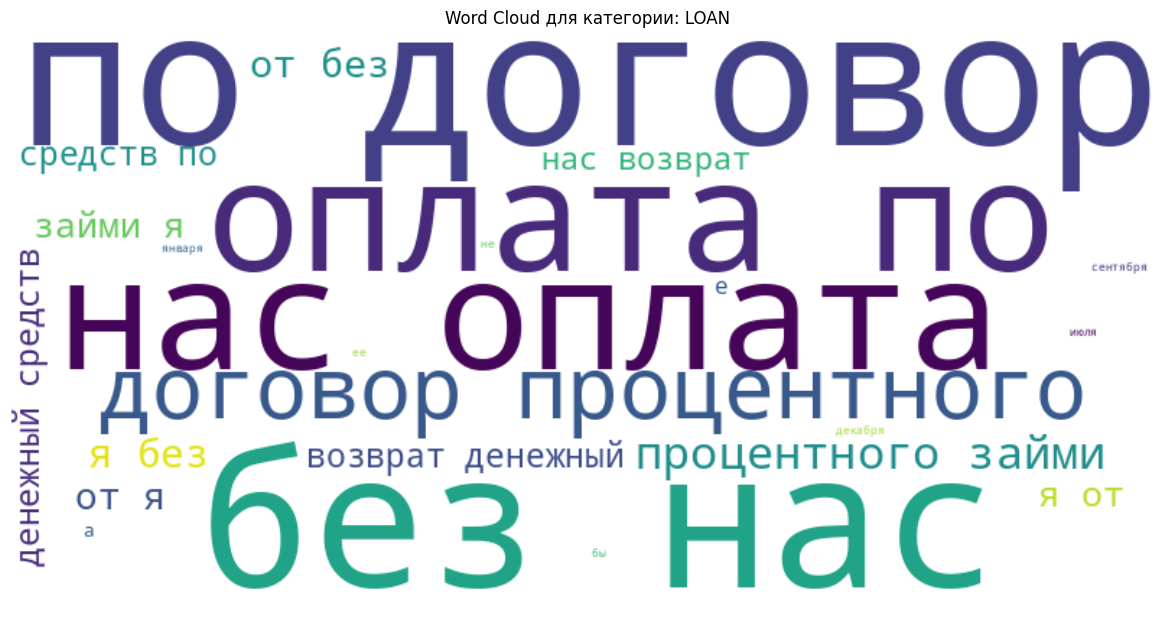

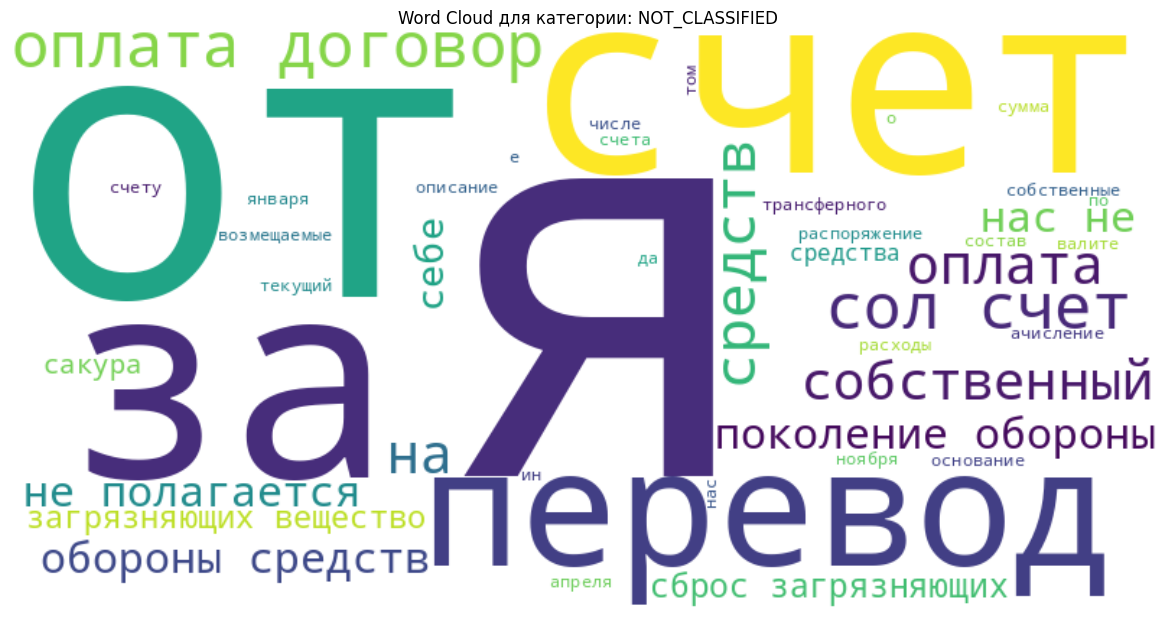

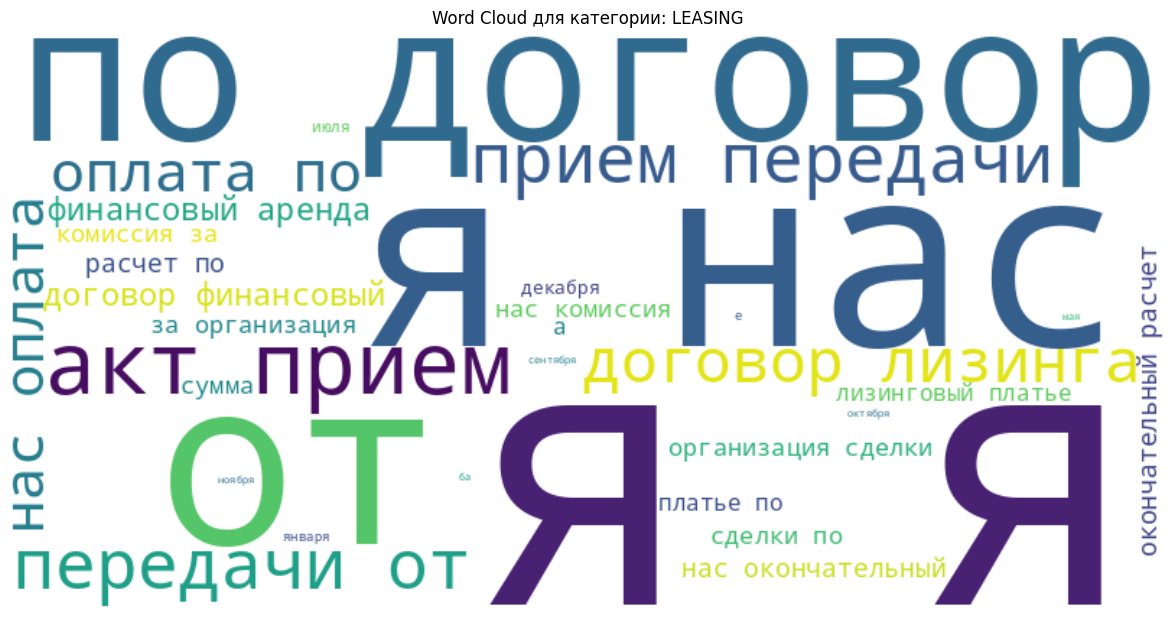

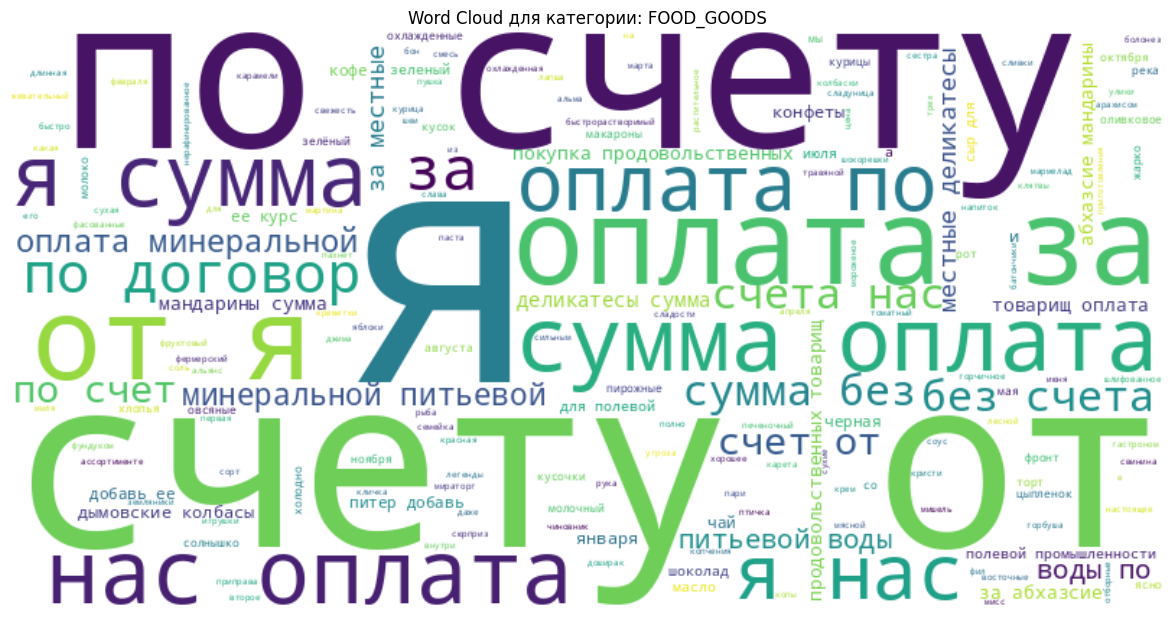

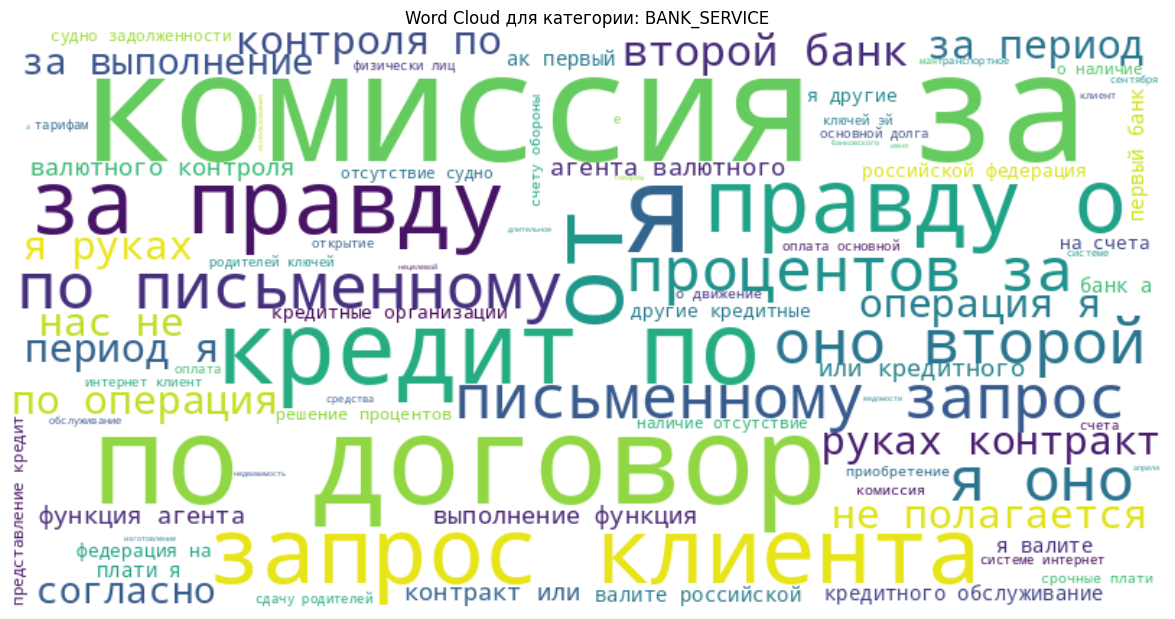

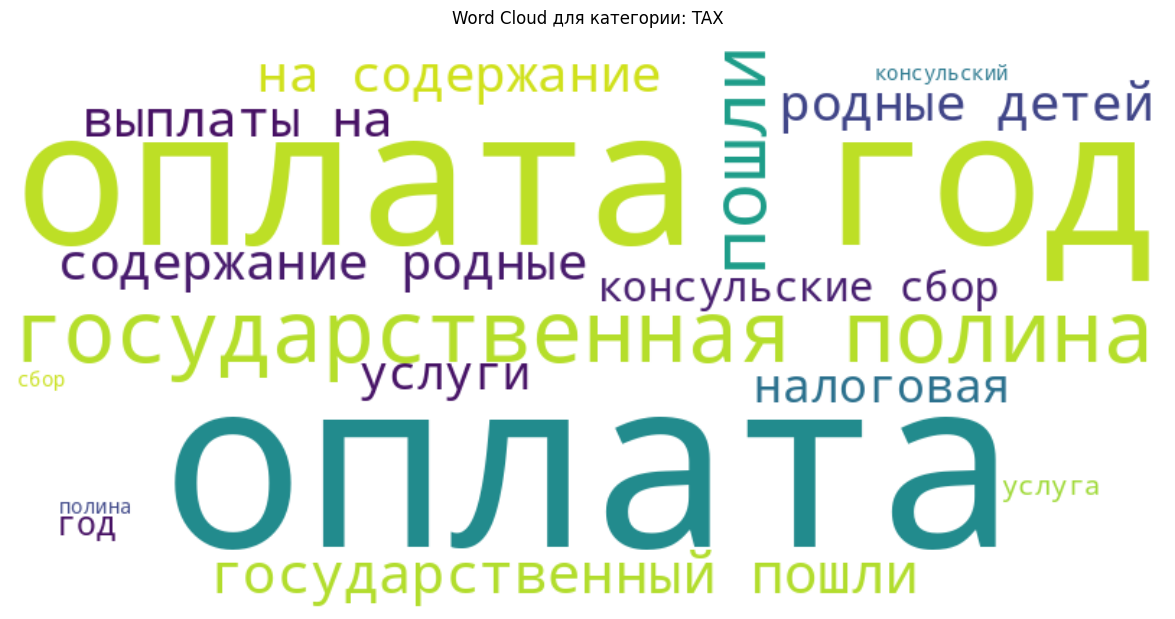

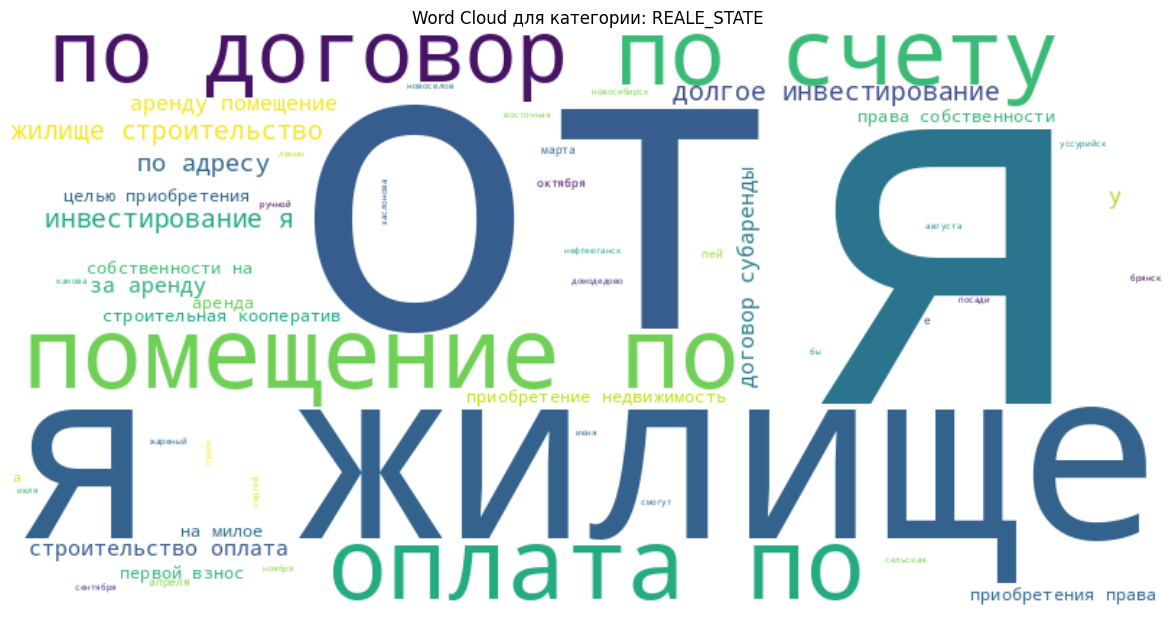

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Распределение категорий
plt.figure(figsize=(12,8))
sns.countplot(data=train_df, x='Категория')
plt.title('Распределение категорий')
plt.xticks(rotation=45)
plt.show()

# Word Cloud для каждой категории
from wordcloud import WordCloud

categories = train_df['Категория'].unique()
for category in categories:
    text = ' '.join(train_df[train_df['Категория'] == category]['Назначение платежа_Clean'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(15, 7.5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud для категории: {category}')
    plt.axis('off')
    plt.show()

## Обучение и оценка модели

In [5]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Проверка доступности GPU
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f'Используется устройство: {device}')

# Параметры
MAX_LEN = 128
BATCH_SIZE = 16
EPOCHS = 5
PRE_TRAINED_MODEL_NAME = 'DeepPavlov/rubert-base-cased'

# Токенизатор
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

# Создание класса Dataset
class PaymentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Подготовка данных
labels = train_df['Категория'].astype('category').cat.codes
label_mapping = train_df['Категория'].astype('category').cat.categories
print(label_mapping)

X_train, X_val, y_train, y_val = train_test_split(
    train_df['Назначение платежа_Clean'],
    labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

train_dataset = PaymentDataset(
    texts=X_train.to_numpy(),
    labels=y_train.to_numpy(),
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

val_dataset = PaymentDataset(
    texts=X_val.to_numpy(),
    labels=y_val.to_numpy(),
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

# Создание DataLoader
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Инициализация модели
model = BertForSequenceClassification.from_pretrained(
    PRE_TRAINED_MODEL_NAME,
    num_labels=len(label_mapping),
    output_attentions=False,
    output_hidden_states=False
)
model = model.to(device)

# Оптимизатор и планировщик
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)

total_steps = len(train_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Функция обучения
def train_epoch(model, data_loader, optimizer, device, scheduler):
    model.train()
    total_loss = 0
    for batch in data_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
    return total_loss / len(data_loader)

from sklearn.metrics import accuracy_score, classification_report

# Функция оценки с добавлением Accuracy
def eval_model(model, data_loader, device):
    model.eval()
    predictions = []
    true_labels = []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1).detach().cpu().numpy()
            label_ids = labels.detach().cpu().numpy()
            predictions.extend(preds)
            true_labels.extend(label_ids)

    return predictions, true_labels

# Обучение модели с выводом точности
for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    train_loss = train_epoch(model, train_loader, optimizer, device, scheduler)
    print(f'Train loss: {train_loss}')

    preds, labels_val = eval_model(model, val_loader, device)

    # Расчет метрик
    accuracy = accuracy_score(labels_val, preds)
    report = classification_report(labels_val, preds, target_names=label_mapping)

    print(f'Accuracy: {accuracy:.4f}')  # Вывод значения Accuracy
    print(report)

Используется устройство: cpu


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

Index(['BANK_SERVICE', 'FOOD_GOODS', 'LEASING', 'LOAN', 'NON_FOOD_GOODS',
       'NOT_CLASSIFIED', 'REALE_STATE', 'SERVICE', 'TAX'],
      dtype='object')


pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/5


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Train loss: 1.5348001527786255
Accuracy: 0.8500
                precision    recall  f1-score   support

  BANK_SERVICE       1.00      1.00      1.00        10
    FOOD_GOODS       0.64      1.00      0.78        18
       LEASING       1.00      1.00      1.00         7
          LOAN       1.00      1.00      1.00         8
NON_FOOD_GOODS       1.00      0.47      0.64        19
NOT_CLASSIFIED       0.83      1.00      0.91         5
   REALE_STATE       1.00      0.80      0.89         5
       SERVICE       1.00      0.78      0.88        18
           TAX       0.71      1.00      0.83        10

      accuracy                           0.85       100
     macro avg       0.91      0.89      0.88       100
  weighted avg       0.90      0.85      0.84       100

Epoch 2/5
Train loss: 0.35655707836151124
Accuracy: 0.9800
                precision    recall  f1-score   support

  BANK_SERVICE       1.00      1.00      1.00        10
    FOOD_GOODS       0.94      0.94      0.94    

In [6]:
torch.save(model.state_dict(), 'model_1.pth')

## Скрипт для предсказаний

In [10]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification

class PaymentDataset(Dataset):
    def __init__(self, texts, tokenizer, max_len):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
        }

def load_model(model_path):
    model = BertForSequenceClassification.from_pretrained(
        'DeepPavlov/rubert-base-cased',
        num_labels=len(label_mapping)
    )
    model.load_state_dict(torch.load(model_path))
    model.eval()
    return model

def predict(model, data_loader, device):
    model.to(device)  # Перемещение модели на GPU, если доступен
    predictions = []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1).detach().cpu().numpy()
            predictions.extend(preds)
    return predictions

def run_prediction(model_path, input_path, output_path):
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

    # Загрузка модели
    model = load_model(model_path)

    # Загрузка токенизатора
    tokenizer = BertTokenizer.from_pretrained('DeepPavlov/rubert-base-cased')

    # Загрузка основного датасета
    man_df = pd.read_csv(input_path, sep='\t')

    # Создание Dataset и DataLoader
    dataset = PaymentDataset(
        texts=man_df['Назначение платежа_Clean'].values[:2500],
        tokenizer=tokenizer,
        max_len=128
    )

    data_loader = DataLoader(dataset, batch_size=32, shuffle=False)  # Попробуйте увеличить размер batch

    # Предсказания
    preds = predict(model, data_loader, device)

    # Маппинг меток
    preds_labels = [label_mapping[p] for p in preds]

    # Создание выходного DataFrame
    output_df = pd.DataFrame({
        'Номер строки': man_df['Номер строки'][:2500].values,
        'Категория': preds_labels
    })

    # Сохранение в TSV
    output_df.to_csv(output_path, sep='\t', index=False)
    print(f'Результаты сохранены в {output_path}')

# После этого выполните ваши предсказания
run_prediction('model_1.pth', 'main_payment.tsv', 'output.tsv')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-10-0ffd25413d27>:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globa

Результаты сохранены в output.tsv
